In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import batting_stats 
from pybaseball import statcast
import seaborn as sns

In [6]:
#declaring initial and final years we want information from
start_dt,end_dt = 2002,2022

In [10]:
data = batting_stats(start_dt, end_dt, qual=200)
data.to_csv("batting.csv")
data.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,...,NaN,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN
1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,60,...,NaN,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN
3,15640,2022,Aaron Judge,NYY,30,144,533,641,169,82,...,0.264,118.4,227.0,0.594,382,0.174,0.290,NaN,NaN,NaN
15,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,0.131,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN
2,1109,2003,Barry Bonds,SFG,38,130,390,550,133,65,...,NaN,NaN,NaN,NaN,0,0.135,0.223,NaN,NaN,NaN


In [13]:
data = data.groupby("IDfg", group_keys=False)
data = data.filter(lambda x: x.shape[0] > 1)
data.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,...,NaN,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN
1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,60,...,NaN,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN
3,15640,2022,Aaron Judge,NYY,30,144,533,641,169,82,...,0.264,118.4,227.0,0.594,382,0.174,0.290,NaN,NaN,NaN
15,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,0.131,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN
2,1109,2003,Barry Bonds,SFG,38,130,390,550,133,65,...,NaN,NaN,NaN,NaN,0,0.135,0.223,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6742 entries, 0 to 976
Columns: 319 entries, IDfg to xwOBA
dtypes: float64(263), int64(52), object(4)
memory usage: 16.5+ MB


In [16]:
def next_season(player):
    player = player.sort_values("Season")
    player["next_WAR"] = player.WAR.shift(-1)
    return player

data = data.groupby("IDfg", group_keys=False).apply(next_season)
data[["Name", "Season", "WAR", "next_WAR"]]

,Name,Season,WAR,next_WAR
5551,Alfredo Amezaga,2006,1.1,2.0
5001,Alfredo Amezaga,2007,2.0,1.2
5246,Alfredo Amezaga,2008,1.2,NaN
1165,Garret Anderson,2002,3.7,5.1
867,Garret Anderson,2003,5.1,0.8
...,...,...,...,...
6032,Owen Miller,2022,0.5,NaN
4880,Andrew Vaughn,2021,-0.3,0.4
2171,Andrew Vaughn,2022,0.4,NaN
6612,Ha-seong Kim,2021,0.5,3.0


In [23]:
print("Total missin values:",data.isnull().sum().sum())

Total missin values: 526463


In [26]:
#removing columns with missing data
full_cols = list(data.columns[data.isnull().sum() == 0])
data = data[full_cols + ["next_WAR"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6742 entries, 5551 to 4566
Columns: 132 entries, IDfg to next_WAR
dtypes: float64(76), int64(52), object(4)
memory usage: 6.8+ MB


In [29]:
data.isnull().sum()

IDfg           0
Season         0
Name           0
Team           0
Age            0
            ... 
Hard%+         0
Events         0
CStr%          0
CSW%           0
next_WAR    1175
Length: 132, dtype: int64

In [35]:
data

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,next_WAR
5551,1,2006,Alfredo Amezaga,FLA,28,132,334,378,87,72,...,86,107,113,143,109,63,0,0.188,0.256,2.0
5001,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,92,101,112,109,113,75,0,0.175,0.227,1.2
5246,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,61,...,99,101,101,123,111,64,0,0.178,0.244,NaN
1165,2,2002,Garret Anderson,ANA,30,158,638,678,195,107,...,118,91,80,65,97,129,0,0.137,0.232,5.1
867,2,2003,Garret Anderson,ANA,31,159,638,673,201,119,...,112,101,80,90,99,109,0,0.164,0.252,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,24655,2022,Owen Miller,CLE,25,123,406,451,100,69,...,93,109,99,130,102,81,327,0.189,0.268,NaN
4880,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,87,104,116,84,99,110,321,0.185,0.285,0.4
2171,26197,2022,Andrew Vaughn,CHW,24,124,476,518,136,90,...,88,108,108,95,98,106,395,0.203,0.287,NaN
6612,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,32,...,126,99,59,137,96,88,201,0.216,0.303,3.0


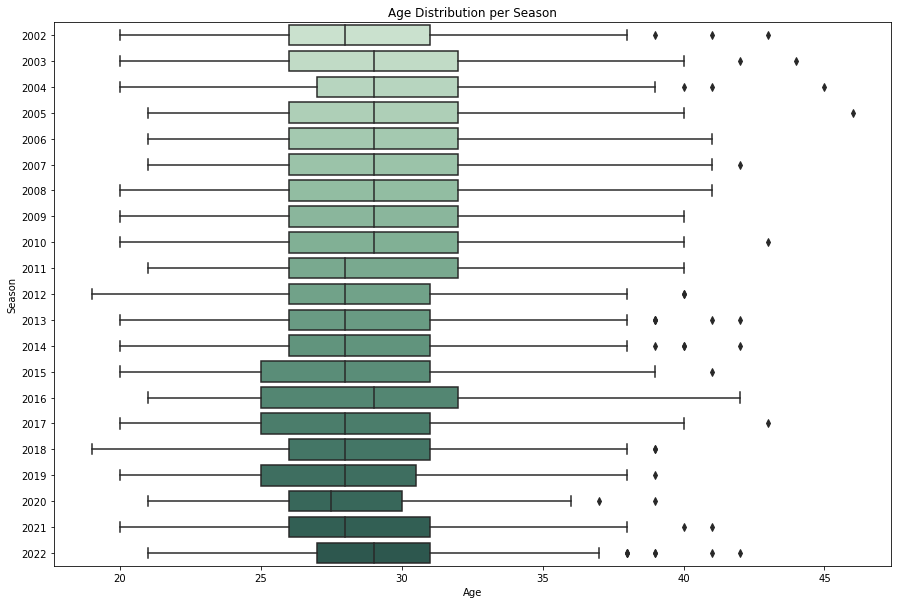

In [41]:
plt.figure(figsize=(15,10))
plt.title("Age Distribution per Season")
sns.boxplot(y="Season", x="Age", data = data, orient="h", palette = 'ch:2.5,-.2,dark=.3')
plt.show();

In [83]:


data['UnderOver30'] = data["Age"].map(lambda x: "under 30" if x < 30 else "30+")
data

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,next_WAR,UnderOver27,UnderOver30
5551,1,2006,Alfredo Amezaga,FLA,28,132,334,378,87,72,...,113,143,109,63,0,0.188,0.256,2.0,27+,under 30
5001,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,112,109,113,75,0,0.175,0.227,1.2,27+,under 30
5246,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,61,...,101,123,111,64,0,0.178,0.244,NaN,27+,30+
1165,2,2002,Garret Anderson,ANA,30,158,638,678,195,107,...,80,65,97,129,0,0.137,0.232,5.1,27+,30+
867,2,2003,Garret Anderson,ANA,31,159,638,673,201,119,...,80,90,99,109,0,0.164,0.252,0.8,27+,30+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,24655,2022,Owen Miller,CLE,25,123,406,451,100,69,...,99,130,102,81,327,0.189,0.268,NaN,under 27,under 30
4880,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,116,84,99,110,321,0.185,0.285,0.4,under 27,under 30
2171,26197,2022,Andrew Vaughn,CHW,24,124,476,518,136,90,...,108,95,98,106,395,0.203,0.287,NaN,under 27,under 30
6612,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,32,...,59,137,96,88,201,0.216,0.303,3.0,under 27,under 30


<AxesSubplot:xlabel='Season', ylabel='count'>

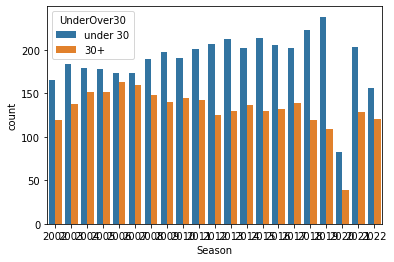

In [84]:
sns.countplot(data=data,x="Season",hue="UnderOver30")